In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splprep, splev

from Faster_Delaunay import delaunay_boundary
from path_finding import path_finding
from splines import generate_increment_on_path
from control import control

from typing import List

In [2]:
example = [{"Label": "Yellow", "Zpos": None, "Ypos": 1.66, "Xpos": -1.16, "Time": None},  # A
           {"Label": "Blue", "Zpos": None, "Ypos": 1, "Xpos": 1, "Time": None},  # B
           {"Label": "Yellow", "Zpos": None, "Ypos": 3.2, "Xpos": -0.14, "Time": None},  # C
           {"Label": "Blue", "Zpos": None, "Ypos": 2.68, "Xpos": 1.64, "Time": None},  # D
           {"Label": "Yellow", "Zpos": None, "Ypos": 4.62, "Xpos": 1.26, "Time": None},  # E
           {"Label": "Blue", "Zpos": None, "Ypos": 3.42, "Xpos": 2.88, "Time": None},  # F
           {"Label": "Yellow", "Zpos": None, "Ypos": 4.98, "Xpos": 3.16, "Time": None}]  # G

In [3]:
example_original = example.copy()

In [4]:
example == eval(str(example))

True

In [5]:
theta = control(example)

In [22]:
triangles, cones = delaunay_boundary(example)
midpoints = path_finding(triangles, cones)
next_point = generate_increment_on_path(midpoints)
theta = np.arctan(next_point[0] / next_point[1])

midpoints = np.concatenate([[[0, 0]], midpoints])
mytck, _ = splprep([midpoints[:, 0], midpoints[:, 1]])
xs, ys = splev(np.linspace(0, 1, num=10000), mytck)
x_close, y_close = splev([0.05], mytck)

/var/folders/r0/d0m6cs7x1fq_kvhchn4ktt5h0000gn/T/ipykernel_86480/2830910456.py:4: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(next_point[0] / next_point[1])


In [23]:
mytck

[array([0., 0., 0., 0., 1., 1., 1., 1.]),
 [array([-0.02060105, -0.31771248,  1.01769279,  3.00978354]),
  array([0.01217667, 1.7677572 , 4.14626235, 4.21007963])],
 3]

x': 3.2743423868255355, y': 4.9323060831308725
4.1305090072997235


/var/folders/r0/d0m6cs7x1fq_kvhchn4ktt5h0000gn/T/ipykernel_86480/2268367540.py:4: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(x_prime)


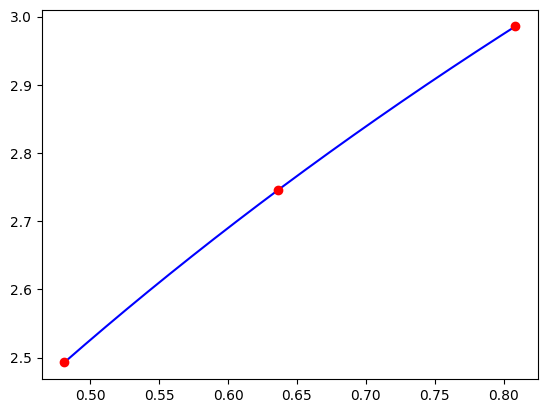

In [21]:
xs_3, ys_3 = splev([0.45, 0.5, 0.55], mytck)
x_prime, y_prime = splev([0.5], mytck, der=1)[:]
x_prime, y_prime = x_prime[0], y_prime[0]
angle = np.arccos(x_prime)
print(f"x': {x_prime}, y': {y_prime}")
xys = np.ndarray((xs_3.shape[0], 2))
xys[:, 0] = xs_3
xys[:, 1] = ys_3
# print(np.dot((xs_3[1] - xs_3[0], ys_3[1] - ys_3[0]), (xs_3[2] - xs_3[1], ys_3[2] - ys_3[1])) / (np.linalg.norm((xs_3[1] - xs_3[0], ys_3[1] - ys_3[0])) * np.linalg.norm((xs_3[1] - xs_3[2], ys_3[1] - ys_3[2]))))
print(np.arccos(np.dot((xs_3[1] - xs_3[0], ys_3[1] - ys_3[0]), (xs_3[2] - xs_3[1], ys_3[2] - ys_3[1])) / (np.linalg.norm((xs_3[1] - xs_3[0], ys_3[1] - ys_3[0])) * np.linalg.norm((xs_3[1] - xs_3[2], ys_3[1] - ys_3[2])))) * 180 / np.pi)
xs_interval, ys_interval = splev(np.linspace(0.45, 0.55, num=10000), mytck)
plt.plot(xs_interval, ys_interval, color="blue")
plt.plot(xs_3, ys_3, "ro")
plt.show()

In [38]:
np.dstack([[1,2], [1, 2]])[0]

array([[1, 1],
       [2, 2]])

In [55]:
midpoints

array([[ 0.  ,  0.  ],
       [-0.08,  1.33],
       [ 0.43,  2.1 ],
       [ 0.75,  2.94],
       [ 1.45,  3.65],
       [ 2.07,  4.02],
       [ 3.02,  4.2 ]])

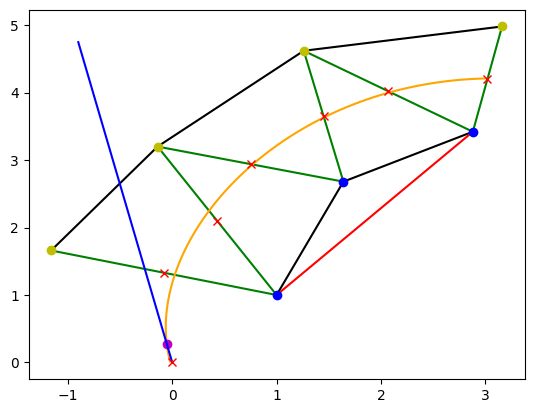

In [86]:
yellows = np.array([np.array([yellow["Xpos"], yellow["Ypos"]]) for yellow in example if yellow["Label"] == "Yellow"])
blues = np.array([np.array([yellow["Xpos"], yellow["Ypos"]]) for yellow in example if yellow["Label"] == "Blue"])
inner_lines = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
boundary_lines = [(0, 2), (2, 4), (4, 6), (1, 3), (3, 5)]
for i1, i2 in inner_lines:
    plt.plot([example_original[i1]["Xpos"], example_original[i2]["Xpos"]], [example_original[i1]["Ypos"], example_original[i2]["Ypos"]], "g")
for i1, i2 in boundary_lines:
    plt.plot([example_original[i1]["Xpos"], example_original[i2]["Xpos"]], [example_original[i1]["Ypos"], example_original[i2]["Ypos"]], "k")
plt.plot([example_original[1]["Xpos"], example_original[5]["Xpos"]], [example_original[1]["Ypos"], example_original[5]["Ypos"]], color="red")
plt.plot(xs, ys, color="orange")
plt.plot(x_close, y_close, color="m", marker="o")
plt.plot(-np.linspace(0, 0.9, num=2), -(y_close / x_close) * np.linspace(0, 0.9, num=2), "b")
plt.plot(midpoints[:, 0], midpoints[:, 1], "rx")
plt.plot(yellows[:, 0], yellows[:, 1], "yo")
plt.plot(blues[:, 0], blues[:, 1], "bo")
plt.savefig("Poster_figure.png", bbox_inches="tight", dpi=600)
plt.show()

In [28]:
def control(cones: List[dict]):
    oranges = []
    j = 0
    for i in range(len(cones)):
        cone = cones[i - j]
        if cone["Label"] == "Orange":
            del cones[i - j]
            oranges.append([cone["Xpos"], cone["Ypos"]])
            j += 1

    if len(oranges) == 2:
        print(np.array(oranges).shape)
        print(np.average(oranges, axis=0))

    print(cones)
    triangles, cones = delaunay_boundary(cones)
    midpoints = path_finding(triangles, cones)
    target_point = generate_increment_on_path(midpoints)
    theta = np.arctan(target_point[0] / target_point[1])

    return theta

In [8]:
print(next_point)
print(midpoints[0])

[0.35863381 0.85780434]
[0.43 2.1 ]


In [12]:
abs(180 - theta * 360 / 2 * np.pi)

43.9314391581934

In [13]:
"Blue" == "Blue" == "Blue"

True

In [23]:
midpoints

array([[ 0.43,  2.1 ],
       [-0.08,  1.33]])

In [11]:
from numpy.linalg import norm
import numpy as np

print([3, 2, 1].pop(1))

2


In [1]:
import math
math.inf == float("inf")

True